# CMSC 320 Final Project

# FIFA Predict Positions

### By Vrundal Shah

## 1. Introduction

The purpose is to demonstrate our knowledge and comprehension of the data lifecycle by applying it to a real-world issue in this project. Our goal in this tutorial is to to appropriately classify soccer players into positional groups depending on their abilities and talents that are most valuable for different positions.

### Background Information

The sport of soccer has an estimated 4.0 billion followers (more than half of the world’s population) and brings in huge amounts of revenue in many places.

Statistical and data analysis in soccer has become more popular in recent years for a variety of reasons, including performance analysis, recruitment, and strategy. In this tutorial, we'll break down the many skill sets that players in various positions require to thrive, as well as examine whether or not players are being employed in their best place.
 
 [This brief explanation](https://www.dummies.com/article/home-auto-hobbies/sports-recreation/soccer/soccer-for-dummies-cheat-sheet-208057/) will help you understand the different soccer positions.
 It covers the many functions of various occupations, which will help you understand the numerous attributes we will discuss and explore later in this tutorial. 

 We will use data from the FIFA game, "FIFA 22", to gather the required information.

- Pandas: for organizing data in dataframes
- Numpy
- Seaborn: for creating create plots 
- matplotlib: Used to format plots
- plotly: for creating easier and prettier pie charts 
- scikit-learn: for creating predictive model to group players into the different groups of positions

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import plotly as pltly
import plotly.express as px
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

## 2. Data Collection

### The Dataset

The dataset we will be using contains data for all soccer players in the game FIFA 22 at the time of its launch. The dataset was found on [Kaggle](https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset?resource=download&select=players_22.csv).

The dataset contains all the players overall ratings, and all the attributes that one can view in the FIFA game. The dataset contains 110 different data values for each player.

We downloaded the dataset as a csv file. Let us load in the dataset, save it as a dataframe and inspect and modify it as nedded for the purpose of this tutorial.

### Load Dataset

In [89]:
ratings = 'players_22.csv' # players
df = pd.read_csv(ratings, dtype={'club_flag_url': "string", 'nation_team_id': 'Int32'})
df

/var/folders/95/ys4pmz512j15j_vw58cqyd840000gn/T/ipykernel_4819/553492891.py:2: DtypeWarning:

Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.



,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


The data appears to be rather clean, except for some missing values, initially after a cursory review. One thing to note is that the datafrane has 110 columns and we are not going to need many of them., so we wil deal with removing the ones that we probably will not be needing and using in this tutorial

### Data cleaning

Drop the columns from the dataframe that we surely won't need in this tutorial. This includes columns like the ones that have the rating for each position in soccer no matter what position the player plays in. Aditionally, we also won't be needing properties like the players wage, value, dob, age, weight, club details, and nation team details.

In [90]:
columns_drop = ['sofifa_id',
 'player_url',
 'value_eur',
 'wage_eur',
#  'age',
#  'dob',
#  'height_cm',
#  'weight_kg',
 'club_team_id',
 'club_jersey_number',
 'club_loaned_from',
 'club_joined',
 'club_contract_valid_until',
 'nationality_id',
 'nation_team_id',
 'nation_jersey_number',
 'passing',
                'pace',
                'shooting',
                'dribbling',
                'defending',
                'physic',
 'ls',
 'st',
 'rs',
 'lw',
 'lf',
 'cf',
 'rf',
 'rw',
 'lam',
 'cam',
 'ram',
 'lm',
 'lcm',
 'cm',
 'rcm',
 'rm',
 'lwb',
 'ldm',
 'cdm',
 'rdm',
 'rwb',
 'lb',
 'lcb',
 'cb',
 'rcb',
 'rb',
 'gk',
 'real_face',
 'release_clause_eur',
 'player_face_url',
 'club_logo_url',
 'club_flag_url',
 'nation_logo_url',
 'nation_flag_url']
df.drop(columns = columns_drop, inplace=True)
df
    

,short_name,long_name,player_positions,overall,potential,age,dob,height_cm,weight_kg,club_name,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,34,1987-06-24,170,72,Paris Saint-Germain,...,96,20,35,24,6,11,15,14,8,NaN
1,R. Lewandowski,Robert Lewandowski,ST,92,92,32,1988-08-21,185,81,FC Bayern München,...,88,35,42,19,15,6,12,8,10,NaN
2,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,36,1985-02-05,187,83,Manchester United,...,95,24,32,24,7,11,15,14,11,NaN
3,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,29,1992-02-05,175,68,Paris Saint-Germain,...,93,35,32,29,9,9,15,15,11,NaN
4,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,30,1991-06-28,181,70,Manchester City,...,89,68,65,53,15,13,5,10,13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,Song Defu,宋德福,CDM,47,52,22,1999-01-02,180,64,Wuhan FC,...,37,38,43,48,6,10,5,15,13,NaN
19235,C. Porter,Caoimhin Porter,CM,47,59,19,2002-03-18,175,70,Derry City,...,47,37,44,47,11,12,6,8,10,NaN
19236,N. Logue,Nathan Logue-Cunningham,CM,47,55,21,2000-02-07,178,72,Finn Harps,...,36,38,44,48,8,6,7,10,6,NaN
19237,L. Rudden,Luke Rudden,ST,47,60,19,2002-04-23,173,66,Finn Harps,...,47,10,14,11,7,10,7,14,15,NaN


There are a couple of different types of positions for each player in the dataframe, as follows, club_position (i.e) position in which the player plays in his club team, player_positions: all positions the player can play in, and nation_position (i.e) the position in which the player plays in his national team. We choose the player_positions, for simplicity, since it includes the possition of the player based on his attributes, rather his position in a team might be adjusted due to a couple reasons by the management. Also. in the club and nation team positions columns, the positions are listed as "Sub" for substitutes on the team, which doesn't give us the players position when he does play, because substitutes do ofcourse play and might just not start a game, same goes for reserves players on the team listed as "Rev".

Hence, we drop the club_position, and nation_position colums from the dataframe.

The player_positions field for many of the players is missing, so we remove those players from the dataframe.

In [91]:
df.drop(columns=['club_position', 'nation_position'], inplace=True)
df.dropna(axis=0, subset=['player_positions'], inplace=True)

Furthermore, for the scope of this project, we will only consider the first position(mostly the best) for the player from the player_positions column.


In [92]:
for i, j in df.iterrows():
    df.at[i, 'player_positions'] = str(df.at[i, 'player_positions']).split(',')[0]

In [93]:
df.rename(columns={'player_positions': 'player_position'}, inplace=True)

For the sake of simplicity, we decided to drop Goal Keepers(GK) from the dataframe, since goalkeepers attributes are usually very very low for players other than the ones who play as goalkeeps and almost never does another position player play as a goalkeeper ever in their career

In [94]:
df.drop(df[df.player_position == "GK"].index, inplace=True)

### A look into FIFA Ratings

EA examines the specific traits of the players, which are given a coefficient and combined together based on the position, in collaboration with data reviewers. The international reputation is added to this number, yielding a FIFA rating.

To learn more about how these ratings are assigned, you can read [this article](https://earlygame.com/fifa/fifa-ratings-explained-overall-rating)!

EA Sports tries to make the simulation of the game as realistic as possible. In order to calculate the overall rating of a player, they take into account specific attributes for that players position that will affect a player's rating more significantly. For example Shooting is more important to the overall rating of Striker than for a Defender.
Now that we have our dataset ready, let's process and explore it!

## 3. Data Processing

### Positional Breakdown

There are a total of 17 positions in soccer that FIFA uses to categorize players; goalkeepers are no longer included, there are 16. Let's look at how all of the participants in the game are positioned.
The positional breakdown of all the players may be seen using a pie chart.
To create properly styled pie charts, we'll be utilizing the plotly library.

In [95]:
# get each position count
position_count = df.groupby(df['player_position']).count().reset_index()
position_count = position_count[['player_position','short_name']]
position_count.rename(columns={'player_position': 'Position',"short_name": "Count"}, inplace = True)
position_count.sort_values('Count', inplace=True, ascending=False)

fig = pltly.graph_objects.Figure(data=[pltly.graph_objects.Pie(labels=position_count['Position'], values=position_count['Count'])])
fig.update_layout(title='Number of Players at each Position')
fig.show()

The average team tends to have more players at defense than any other specific position, which we can see clearly from the above pie chart, the center backs(CB) and left back (LB) and right back (RB) make up the most number of players on average in any team formation in soccer.

### Groups by position

Players in certain positional groups tend to have a similar skillset. For example, two players that play different positions on the offensive line will both have relatively high blocking attribute ratings. In order to simplify the classification of players, we will group them up into categories like the above Bleacher Report article did. The code below is pretty self explanatory as to how we will group specific positions into their respective positional groups. We will store all the positional groupings in a dictionary, and then take a look at how the pie chart changes when we group positions.

In [96]:
# function for creating dataframe for each of the groups of positions groups that can be used in later parts
def get_pos_groups_dfs(df):
    positions_groups_df = {}
    def get_pos_grp_lst(group):
        res = df.loc[df['player_position'].isin(group)]
        return res

    def categorize_pos (pos):
        for k, v in positions.items():
            if pos in v:
                return k
    

    positions_groups_df['Center Backs'] = get_pos_grp_lst(['CB'])
    positions_groups_df['Wing Backs'] = get_pos_grp_lst(['RB', 'RWB', 'LB', 'LWB'])
    positions_groups_df['Center Midfielders'] = get_pos_grp_lst(['CM', 'CAM'])
    positions_groups_df['Midfielders'] = get_pos_grp_lst(['LM', 'LW'])
    positions_groups_df['Strikers'] = get_pos_grp_lst(['ST','CF','LF', 'RF'])
    return positions_groups_df

In [97]:
# Creating groups by Position
positions_groups = {}
positions_groups['Center Backs'] = ['CB']
positions_groups['Wing Backs'] = ['RB', 'RWB', 'LB', 'LWB']
positions_groups['Center Midfielders'] = ['CM', 'CAM', 'CDM']
positions_groups['Midfielders'] = ['LM', 'LW', 'RM', 'RW']
positions_groups['Strikers'] = ['ST', 'CF', 'LF', 'RF']

def categorize_pos(pos):
    for key, value in positions_groups.items():
        if pos in value:
            return key
        
df['Position Group'] = df.apply (lambda row: categorize_pos(row['player_position']), axis=1)

# getting dictionary with dataframe for each of the groups of positions groups
positions_groups_df = get_pos_groups_dfs(df)

counts = []
for p_df in positions_groups_df.values():
    counts.append(len(p_df['long_name']))

fig = pltly.graph_objects.Figure(data=[pltly.graph_objects.Pie(labels=list(positions_groups_df.keys()), values=counts)])
fig.update_layout(title='Total Number of Players in Each Position Group')
fig.show()

The majority of them are defensive players once again.

We'll make a stacked bar graph that breaks down the position groups into individual positions as well to help visualize the breakdown of positions.

In [98]:
all_positions_count = {'CAM': [], 'CB': [], 'CDM': [], 'CF': [], 'CM': [], 'LB': [], 'LM': [], 'LW': [], 'LWB': [], 'RB': [], 'RM': [], 'RW': [], 'RWB': [], 'ST': []}
bar_data_df = pd.DataFrame()
bar_data_df['Position Group'] = list(positions_groups_df.keys())
bar_data_df.set_index('Position Group', inplace=True)
for group, p_df in positions_groups_df.items():
    for pos, lst in all_positions_count.items():
        lst.append(len(list(p_df.loc[df['player_position'] == pos]['player_position'])))
for pos, lst in all_positions_count.items():
    bar_data_df[pos] = lst

<AxesSubplot:title={'center':'Full Position Breakdown of FIFA Players'}, xlabel='Position Group'>

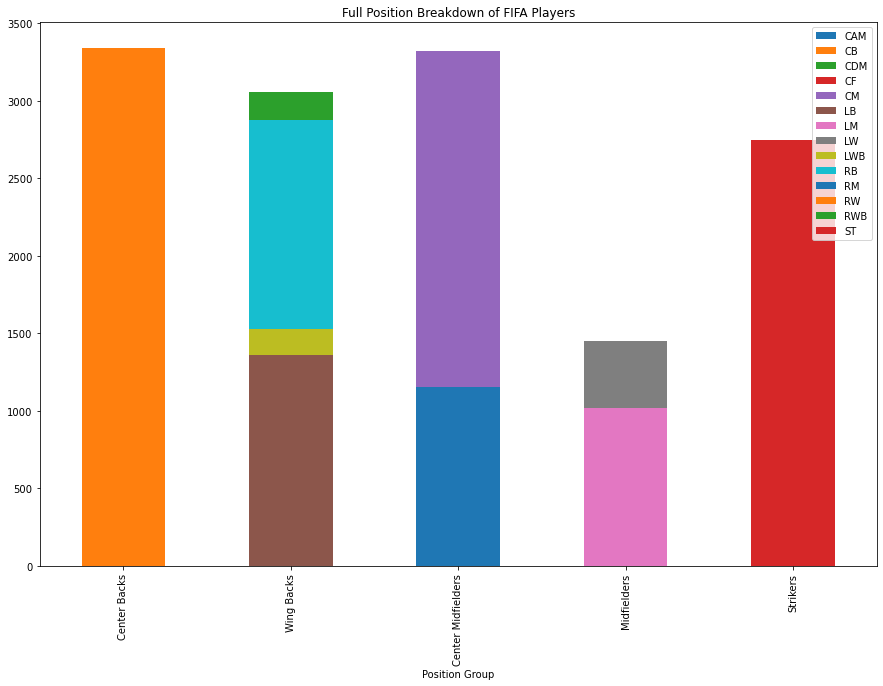

In [99]:
bar_data_df.plot.bar(stacked=True, subplots=False, figsize=(15,10), title='Full Position Breakdown of FIFA Players')

This stacked bar graph gives a better representation of frequencies of each positition in each of the position groups. Some quick things we can notice are that center backs and center midfielders are the most frequently occurring position group.

## 4. Exploratory Data Analysis

As previously stated, different traits are weighted differently based on a player's position when determining the player's overall rating. We divided players into positional categories based on their skill sets. Now we must group traits together to build these different skill sets.

### 4.1 Attribute Categories

We use the [futbin player description of traits](https://www.futbin.com/22/player/25461/christopher-nkunku) to get how to create the groups of traits for the different skillsets. Below, we simply groups attributes into variuos categories. We do so as follows:

- Physical: Any physical characteristic associated with fitness and strength
- Passing: Any quality that has to do with passing(long and short) or accuracy
- Pace: Any characterics relating to speed
- Shooting: Any attribute relating toshooting the ball
- Dribbling: Any attribute relating to defeating defenders andmoving the ball forward
- Defending: Any attribute relating to applying pressure and blocking the ball from going inside the goal

In [100]:
physicality = ['power_jumping', 'power_stamina','power_strength', 'mentality_aggression']
passing = ['mentality_vision', 'attacking_crossing', 'attacking_short_passing', 'skill_long_passing', 'skill_fk_accuracy', 'skill_curve']
pace = ['movement_acceleration', 'movement_sprint_speed']
shooting = ['mentality_positioning', 'attacking_finishing', 'power_shot_power', 'power_long_shots', 'attacking_volleys', 'mentality_penalties']
dribbling = ['movement_agility', 'movement_balance', 'movement_reactions', 'skill_ball_control', 'skill_dribbling', 'mentality_composure']
defending = ['mentality_interceptions', 'attacking_heading_accuracy', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle']

Let us now add these to a dataframe to keep track of these categorical attributes. We will also go ahead and calculate the aggregate rating for each of these attribute groups. We will do this by simply taking the mean of the ratings of the attributes that are contained in each category, and saving them into the categories mentioned in the text above.

In [101]:
df['physicality'] = df[physicality].mean(axis=1)
df['passing'] = df[passing].mean(axis=1)
df['pace'] = df[pace].mean(axis=1)
df['shooting'] = df[shooting].mean(axis=1)
df['dribbling'] = df[dribbling].mean(axis=1)
df['defending'] = df[defending].mean(axis=1)
category_ratings_df = df[['long_name', 'player_position', 'physicality', 'passing', 'pace', 'shooting', 'dribbling', 'defending', 'overall']]
category_ratings_df = category_ratings_df.rename(columns={'player_position': 'position'})
category_ratings_df.head(10)

,long_name,position,physicality,passing,pace,shooting,dribbling,defending,overall
0,Lionel Andrés Messi Cuccittini,RW,63.25,91.500000,85.5,88.500000,94.666667,37.8,93
1,Robert Lewandowski,ST,82.00,78.500000,78.0,91.000000,85.500000,47.0,92
2,Cristiano Ronaldo dos Santos Aveiro,ST,78.00,80.833333,86.5,91.833333,87.500000,39.8,91
3,Neymar da Silva Santos Júnior,LW,65.25,86.166667,91.0,84.833333,92.000000,39.2,91
4,Kevin De Bruyne,CM,75.50,90.500000,76.0,86.166667,86.000000,61.4,91
6,Kylian Mbappé Lottin,ST,76.25,77.500000,97.0,85.833333,90.000000,40.4,91
9,Harry Kane,ST,81.75,81.000000,69.5,90.666667,82.000000,50.8,90
10,N'Golo Kanté,CDM,84.75,67.500000,78.5,63.833333,85.166667,82.8,90
11,Karim Benzema,CF,75.50,79.166667,76.0,85.666667,84.833333,42.6,89
13,손흥민 孙兴慜,LM,68.50,80.500000,87.5,84.500000,85.833333,44.8,89


#### 4.2 Correlation of Attributes for different positions

The next stage will be to determine the relationship between the category qualities and the overall rating of each job group.
As previously stated, various positions value qualities differently. 

In [102]:
# getting dictionary with dataframe for each of the groups of 
    #positions, again since some new cols were added to the dataframe and we need those in this this df
positions_groups_df = get_pos_groups_dfs(df)

For each position group, we can now generate correlation matrices.
This will allow us to observe how attribute categories affect a player's overall rating in different position groupings.

#### 4.3 Understanding the correlation

Assumption before testing: I am assuming their is a strong correlation between passing,shooting, dribbling and overall of the midfielder .Firstly , passing and overall because midfielder has to rotate the game between defence and attack adn its their prime job to keep that ball is being delivered on target , timely. Secondly , dribbling and overall because the midfielder has to face the most press form then opponents defence and attak both and they have to go throught the most players before they get it to the right person on point. Thirdly , Shooting and overall because the players sometimesmay have to gtake shoots from distance or they are highly likely to find themselves as the last man standing between goal and themselves.

<AxesSubplot:title={'center':'Correlation Heatmap of Overall and Attributes (Midfielders)'}>

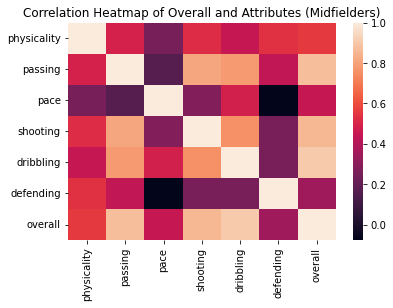

In [103]:
plt.title("Correlation Heatmap of Overall and Attributes (Midfielders)", fontsize=12)
sns.heatmap(positions_groups_df["Midfielders"][['physicality', 'passing', 'pace', 'shooting', 'dribbling', 'defending', 'overall']].corr())

After observing the heatmap I can see that they are light in color which supports my assumption.

Assumption: I am assuming that there is a strong correlation between Strikers shooting and dribbling. Firstly because they are usually midfielders pass to end the game. Secondly because they might have to dribble right before finishing.

<AxesSubplot:title={'center':'Correlation Heatmap of Overall and Attributes (Strikers)'}>

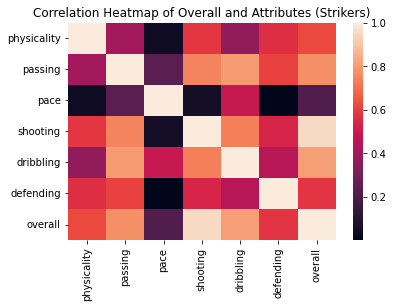

In [104]:
plt.title("Correlation Heatmap of Overall and Attributes (Strikers)", fontsize=12)
sns.heatmap(positions_groups_df["Strikers"][['physicality', 'passing', 'pace', 'shooting', 'dribbling', 'defending', 'overall']].corr())

Observation : The result hold true because I can observe light colour in the correlation map whick implies there is a very strong correlation between overall and shooting and coherently overall and dribbling.

Now that we've figured out which traits are vital for players in various positions, we'll look at players' skill sets and try to estimate which position group their skill set will be most suited for.
We may then compare that to the present positions in which players are playing. 

### 5. Machine Learning & Visualization

In this last section, our aim will be to develop a model that can accurately categorize players into positional groups based on their skillset. We believe that because we have many possible position groups that we can classify a player into, using a Linear Discriminant Analysis (LDA) model to categorize players will be an accurate method of doing so. Furthermore, our classification task fits the assumptions of LDA well: the true groups are known already, and we have numerical independent variables (the attributes) and a categorical dependent variable (the predicted category of a given player).  

#### 5.1 Creation and Training of Model

First, we will divide our dataframe of players into features and labels.

When we try to fit this model, it is required that we split the data into a training set and test set. Our next step is to break up the players dataframe into these two groups. We will be using a test size of __0.3__.

In [105]:
predictors = df.iloc[:,57:].to_numpy()
labels = df.iloc[:, 56].to_numpy()

predictors_train, predictors_test, labels_train, labels_test = train_test_split(predictors, labels, test_size=0.3)

Now that we have our data split into testing and training sets, we can use the training data to fit our LDA model. Once fitted, we can use the model to predict position groups for players in the test set. We can then check how accurate our model is.

In [106]:
lda = LinearDiscriminantAnalysis()
lda.fit(predictors_train, labels_train)

predictions = lda.predict(predictors_test)

print('Accuracy of our LDA model is' + str(accuracy_score(labels_test, predictions)))

Accuracy of our LDA model is0.7593999610364309


__Results!__

We tried running this multiple times for consistency, and always received pretty accurate results, typically with an accuracy score in the low to mid 0.7's.

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)
# Recall
from sklearn.metrics import recall_score
recall_score(y_true, y_pred, average=None)
# Precision
from sklearn.metrics import precision_score
precision_score(y_true, y_pred, average=None)